In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv', sep='\t', header=None, names=['label', 'message'])
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data.isnull().sum()


,0
label,0
message,0


In [5]:
X = data['message']
y = data['label']

vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



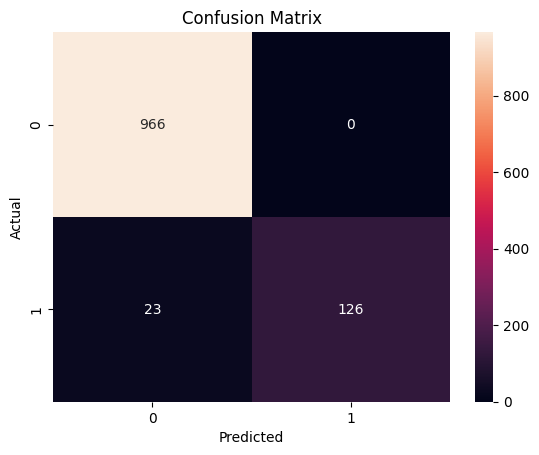

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
sample = ["Free entry in 2 a wkly comp to win FA Cup final tkts"]
sample_vec = vectorizer.transform(sample)
print("Spam" if model.predict(sample_vec)[0] else "Not Spam")


Spam
